# Makes predictions of unlabeled images

In [1]:
# import libraries and dependencies
import tensorflow as tf 
import os
import numpy as np 
import matplotlib.pyplot as plt
import cv2

In [6]:
test_dir = 'F:/Nilgai_photo_database/Nilgai Classifier/Nilgai/sample_images/'
mulit_model_path = 'F:/Nilgai_photo_database/Nilgai Classifier/Nilgai/models/FINALE_MULTI_multi_20_epo_200K_'

BATCH_SIZE = 100
IMG_HEIGHT = 299
IMG_WIDTH = 299

def img_crop(img):
    # for cropping
    offset_width = 0
    offset_height = 9
    target_height = 273
    target_width = 299

    # for random width shift
    wrg = 0.5 
    hrg = 0.0
    row_axis =  2
    channel_axis = 1

    new_img = tf.image.crop_to_bounding_box(img, offset_height, offset_width, target_height, target_width)
    new_img = tf.image.resize(new_img, (299,299))
    return new_img

img_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,preprocessing_function=img_crop )

test_generator = img_generator.flow_from_directory(directory=str(test_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode= None)

Found 100 images belonging to 1 classes.


In [5]:
multi_model = tf.keras.models.load_model(mulit_model_path, compile=True)

In [9]:
pred_steps=np.ceil(test_generator.samples/test_generator.batch_size)

pred = multi_model.predict(test_generator, verbose=1, workers=4, steps=pred_steps)

1/1 [==============================] - 0s 4ms/step


In [39]:
class_names = {'Armadillo': 0,
 ('Birds', 1,
 ('Bobcat', 2),
 ('Cattle', 3),
 ('Coyote', 4),
 ('Dog', 5),
 ('Exotics, other', 6),
 ('Horse', 7),
 ('Humans', 8),
 ('Mouse', 9),
 ('Nilgai', 10),
 ('None', 11),
 ('Ocelot', 12),
 ('Opossum', 13),
 ('Pig', 14),
 ('Rabbit', 15),
 ('Raccoon', 16),
 ('Rat', 17),
 ('Skunk', 18),
 ('Spider', 19),
 ('Squirrel', 20),
 ('Tortoise/Turtle', 21),
 ('Turkey', 22),
 ('Unknown', 23),
 ('White-tailed deer', 24)]
class_names = np.array([key.title() for key, value in class_names])
class_names

ValueError: too many values to unpack (expected 2)

In [32]:
predicted_indices = tf.argmax(pred, 1)

In [33]:
predicted_class = tf.gather(class_names, predicted_indices)

In [34]:
predicted_class

<tf.Tensor: shape=(100,), dtype=string, numpy=
array([b'Opossum', b'Raccoon', b'Nilgai', b'White-Tailed Deer', b'Mouse',
       b'Pig', b'Birds', b'Cattle', b'Dog', b'Rabbit', b'Rat', b'Cattle',
       b'Birds', b'Ocelot', b'Skunk', b'Skunk', b'Mouse', b'Opossum',
       b'Tortoise/Turtle', b'Spider', b'None', b'Turkey', b'Rat',
       b'Ocelot', b'Armadillo', b'Squirrel', b'Raccoon', b'Nilgai',
       b'Humans', b'Coyote', b'Nilgai', b'Pig', b'Bobcat', b'Raccoon',
       b'Ocelot', b'Birds', b'Armadillo', b'Skunk', b'None', b'Skunk',
       b'Raccoon', b'Mouse', b'Tortoise/Turtle', b'Humans', b'Humans',
       b'Exotics, Other', b'Squirrel', b'Horse', b'Turkey', b'Opossum',
       b'Rat', b'None', b'White-Tailed Deer', b'Pig', b'Cattle',
       b'Exotics, Other', b'Exotics, Other', b'Coyote', b'Bobcat',
       b'Rabbit', b'Humans', b'Armadillo', b'Bobcat', b'Rabbit',
       b'Cattle', b'Coyote', b'Mouse', b'Unknown', b'Tortoise/Turtle',
       b'Dog', b'Turkey', b'White-Tailed Deer', 

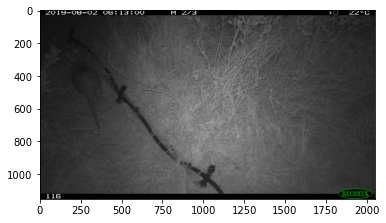

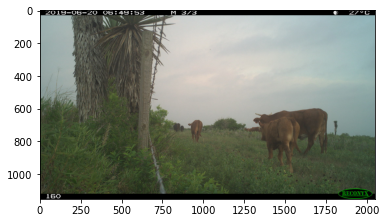

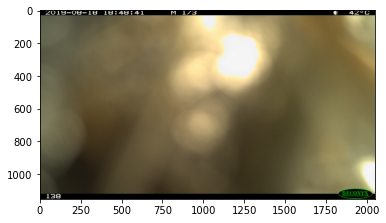

In [4]:
import matplotlib.image as mpimg
for ima in test_imgs[0:3]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [5]:


#Lets declare our image dimensions
#we are using coloured images. 
nrows = 299
ncolumns = 299
channels = 3  #change to 1 if you want to use grayscale image

def read_and_process_image(list_of_images):
    """
    Returns two arrays: 
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y = [] # labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  #Read the image
        #get the labels
        if 'dog' in image:
            y.append(1)
        elif 'cat' in image:
            y.append(0)
    
    return X, y
#Now lets predict on the first 10 Images of the test set
X_test, y_test = read_and_process_image(test_imgs[0:10]) #Y_test in this case will be empty.
x = np.array(X_test)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [19]:
from tensorflow.keras.preprocessing import image
img_width, img_height = 299, 299



In [16]:
i = 0
text_labels = []
columns = 5
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(x, batch_size=1):
    
    pred = multi_model.predict(batch)
    predicted_class_indices = np.argmax(pred, axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    predictions = [labels[k] for k in predicted_class_indices]


    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.title('This is a ' + text_labels[i])
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 10 == 0:
        break
plt.show()

[[5.93043193e-13 7.45190801e-12 2.35895049e-12 2.61786637e-09
  3.53852852e-13 1.47462243e-13 1.27443778e-13 1.11050633e-12
  1.06479825e-09 5.66407327e-13 1.18636478e-13 6.91133357e-15
  4.15424395e-13 9.35138252e-13 5.27106303e-10 8.55650132e-13
  4.49837867e-12 8.66930497e-14 1.00274945e-13 1.00000000e+00
  1.55805620e-12 2.81704083e-14 2.28908926e-14 2.96478055e-12
  2.61970934e-09]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# List directory where non-labeled images are stored
folder_dir = "F:/Nilgai_photo_database/test/test2"

# Path to trained model weight file

model_file = 

result_dir_location = "F:/Nilgai_photo_database/test/results"

# New directory names for results based on classes
dir_name_none = result_dir_location + "/" + "results_none"
dir_name_animal = result_dir_location + "/" + "results_animals"


# Get model
model = get_pretrained_model('vgg16', num_classes=2, batch_size=1)


if not os.path.exists(dir_name_none):
            os.mkdir(dir_name_none)
            os.mkdir(dir_name_animal)

for item in os.listdir(folder_dir):
    # Get single non-labeled image in directory
    img_path = os.path.join(folder_dir,item)

    # Load into model
    img_load = model(image_loader(transforms, img_path))

    # Detach from gpu
    img_format = img_load.cpu().detach().numpy()
    result = np.argmax(img_format)

    # If result is a "0", it moves the image to a premade directory labeld ("...none")
    if result == 0:
        img_name = os.path.split(img_path)[1]
        new_loc = os.path.join(dir_name_none,img_name)
        shutil.copy(img_path, new_loc)

    # If result is a "1", it moves the image to a premade directory labeld ("...animal")
    elif result == 1:
        img_name = os.path.split(img_path)[1]
        new_loc = os.path.join(dir_name_animal,img_name)
        shutil.copy(img_path, new_loc)

print("Inferencing is complete")